In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/ElectricCarData_Clean_Me.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# understanding data

In [ ]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,460,70.0,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,45.0,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,75.0,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,74.0,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,28.5,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Nissan,Ariya 63kWh,7.5,160,330,63.0,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
98,Audi,e-tron S Sportback 55 quattro,4.5,210,335,86.5,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
99,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,63.0,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
100,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,87.0,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [ ]:
df.isnull().sum()

Brand               0
Model               0
AccelSec            0
TopSpeed_KmH        0
Range_Km            0
Battery_Pack Kwh    0
Efficiency_WhKm     0
FastCharge_KmH      0
RapidCharge         0
PowerTrain          0
PlugType            0
BodyStyle           0
Segment             0
Seats               0
PriceEuro           0
dtype: int64

In [ ]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Battery_Pack Kwh', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge',
       'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [ ]:
df.dtypes

Brand                object
Model                object
AccelSec            float64
TopSpeed_KmH          int64
Range_Km              int64
Battery_Pack Kwh    float64
Efficiency_WhKm       int64
FastCharge_KmH        int64
RapidCharge          object
PowerTrain           object
PlugType             object
BodyStyle            object
Segment              object
Seats                 int64
PriceEuro             int64
dtype: object

In [ ]:
# extra column to calculate prices in range to make calculations easy
df['FullName'] = df['Brand'] + '-' + df['Model']
df_1 = df.loc[df['PriceEuro'] <= 50000]
df_2 = df.loc[df['PriceEuro'] > 50000]
t1 = 'Less than 50,000 Euros' 
t2 = 'More than 50,000 Euros'

In [ ]:
#plot for power train 
def power_train(dataframe): 
    sns.countplot(x= dataframe['PowerTrain'])
    plt.title('Count Plot of Powertrain', fontsize = 20)
    plt.xlabel('Power Train', fontsize = 15)
    plt.ylabel('Count', fontsize = 15)

In [ ]:
#count plot for body style
def bodystyle(dataframe):
    plt.figure(figsize=(10, 5))
    sns.countplot(x= 'BodyStyle', data= dataframe, hue='PowerTrain')
    plt.title('Count plot of Body Style', fontsize= 20)
    plt.xlabel('Body Style', fontsize= 15)
    plt.ylabel('Count', fontsize= 15)
    plt.show()

In [ ]:
# plot for range of vehicle
def range(dataframe, price):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot('FullName', 'Range_Km' , data = dataframe, hue = dataframe['PowerTrain'])
  plt.title('''Range(Km) of EV's costing {} '''.format(price), fontsize = 20)
  plt.ylabel('Range (Km)', fontsize= 15)
  plt.xlabel('Model', fontsize= 15)
  plt.xticks(rotation = 90)
  plt.show()

In [ ]:
# plot for range vs battery pack
def range_batterypack(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'steelblue')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.105))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['Battery_Pack Kwh'], label= 'Battery Pack', color = 'black')
  plt.title('''RANGE (Km) vs BATTERY PACK CAPACITY (KwH) of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'steelblue', size = 20)
  ax2.set_ylabel('Battery Pack Capacity (Kwh)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()

In [ ]:
# acceleration (time taken from 0 to 100 km/hr speed)
def acc(dataframe, text):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot('FullName', 'AccelSec', data = dataframe, hue = dataframe['PowerTrain'])
  plt.title('''Acceleration 0-100 Km  of EV's costing {}'''.format(text), fontsize= 20)
  plt.ylabel('Acceleration (seconds)')
  plt.xlabel('Model')
  plt.xticks(rotation = 90)
  plt.show()

In [ ]:
# range vs price
def range_price(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'steelblue')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.1))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['PriceEuro'], label= 'Price', color = 'black')
  plt.title('''RANGE (Km) vs PRICE (Euros)of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'steelblue', size = 20)
  ax2.set_ylabel('Price (Euros)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()

In [ ]:
# range vs efficiency
def range_efficiency(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'darkseagreen')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.1))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['Efficiency_WhKm'], label= 'Price', color = 'black')
  plt.title('''RANGE (Km) vs Efficiency (Wh/km)of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'darkseagreen', size = 20)
  ax2.set_ylabel('Efficiency (Wh/Km)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()

In [ ]:
# fast charging data
def fastcharge(dataframe, price):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot('FullName', 'FastCharge_KmH' , data = dataframe, color = 'lightslategrey')
  plt.title('''Fast Charging of EV's costing {} '''.format(price), fontsize = 20)
  plt.ylabel('Charging Capacity (kmH)', fontsize= 15)
  plt.xlabel('Model', fontsize= 15)
  plt.xticks(rotation = 90)
  plt.show()

In [ ]:
# count plots

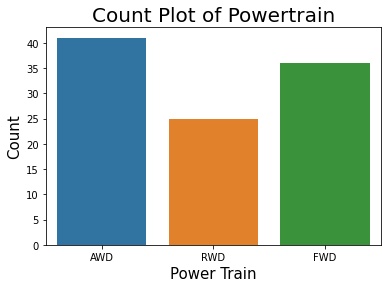

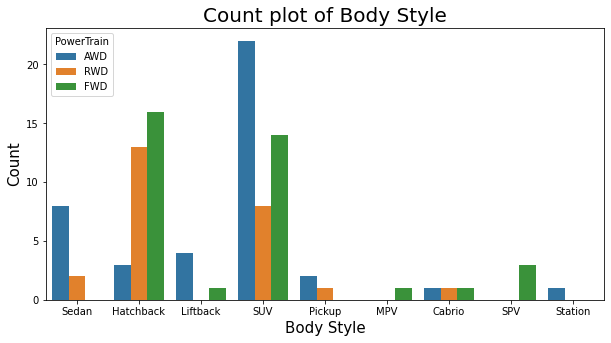

In [ ]:
power_train(df)
bodystyle(df)

In [ ]:
# bar graphs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


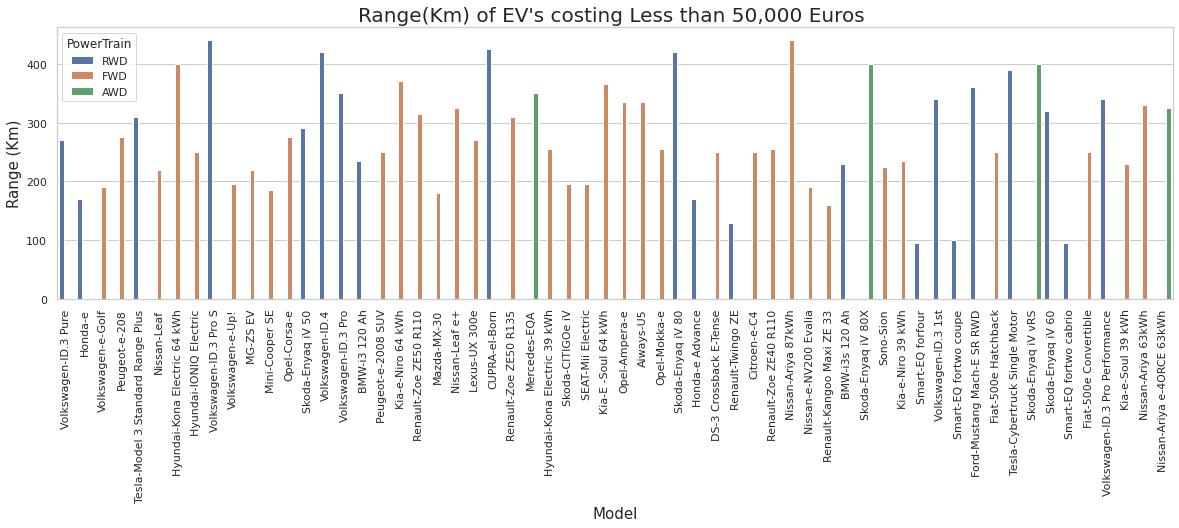

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


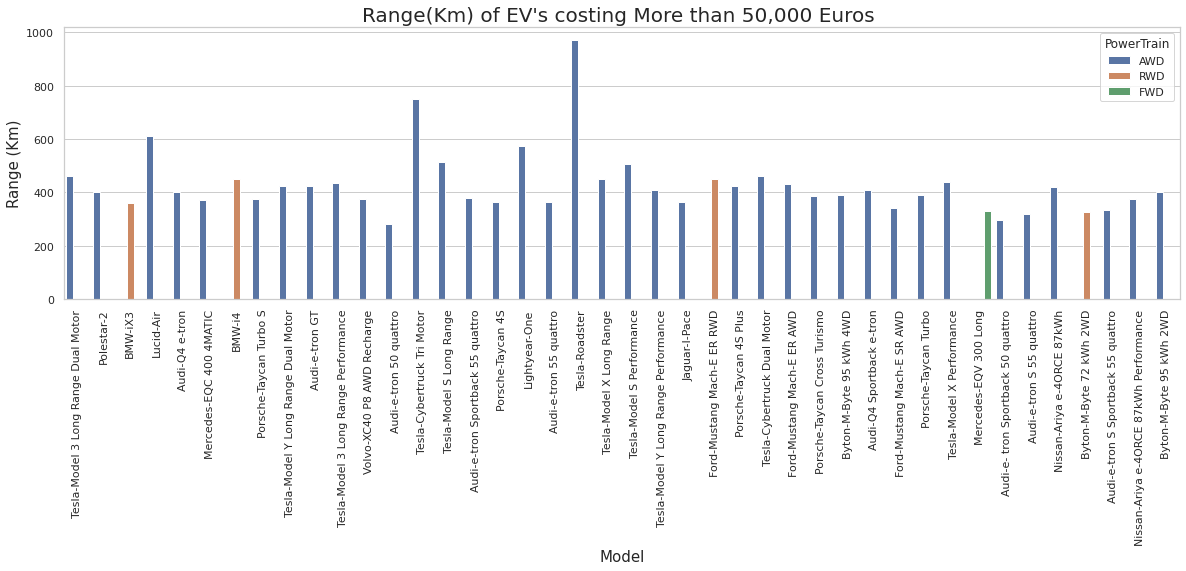

In [ ]:
range(df_1, t1)
range(df_2, t2)

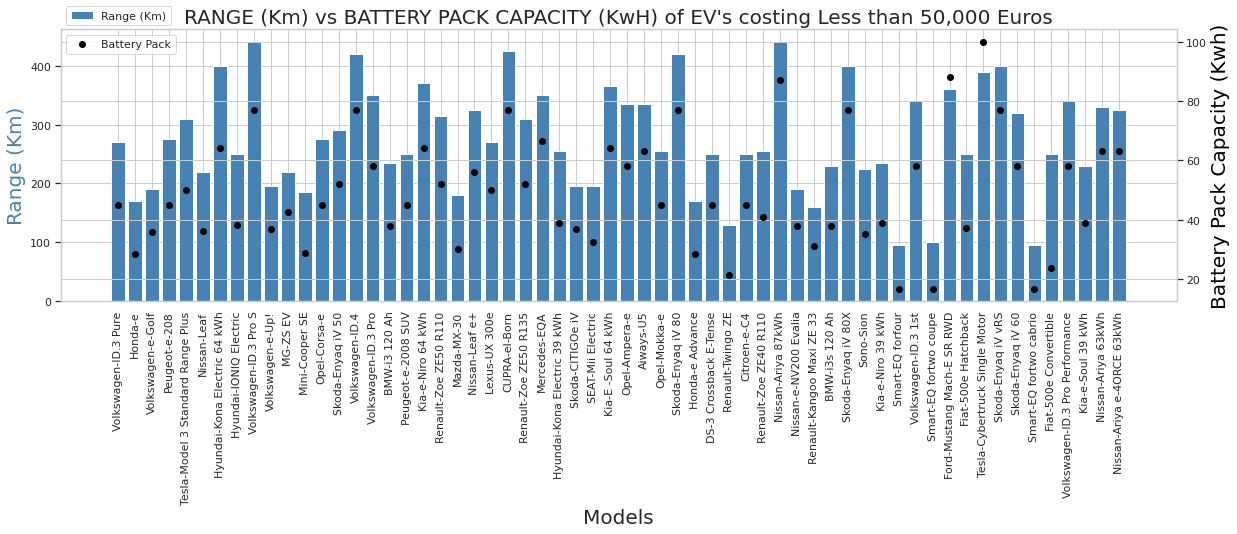

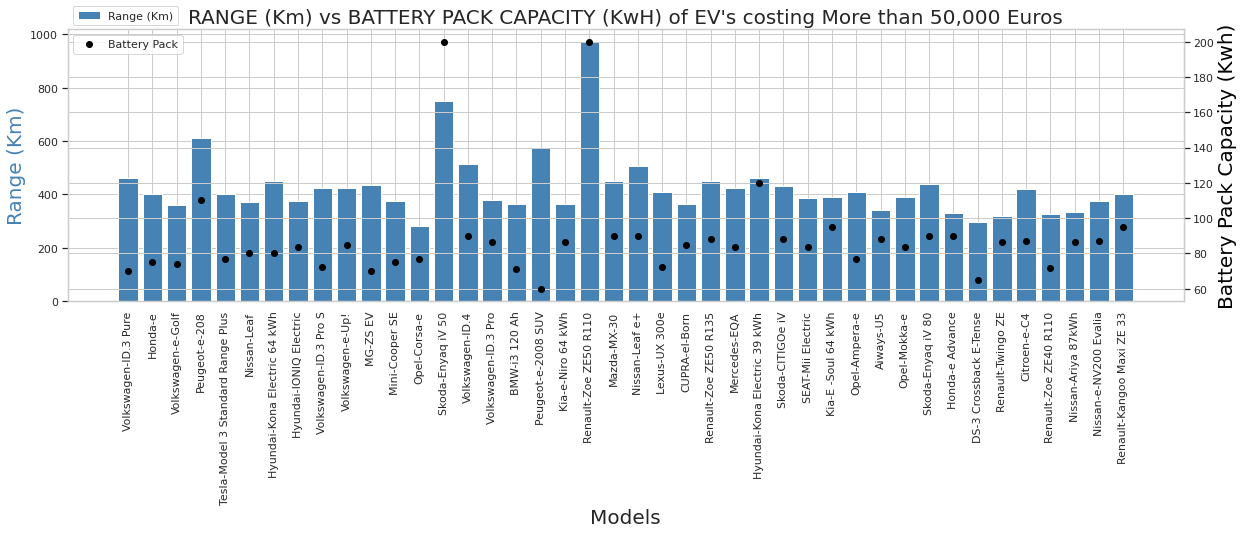

In [ ]:
range_batterypack(df_1, t1)
range_batterypack(df_2, t2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


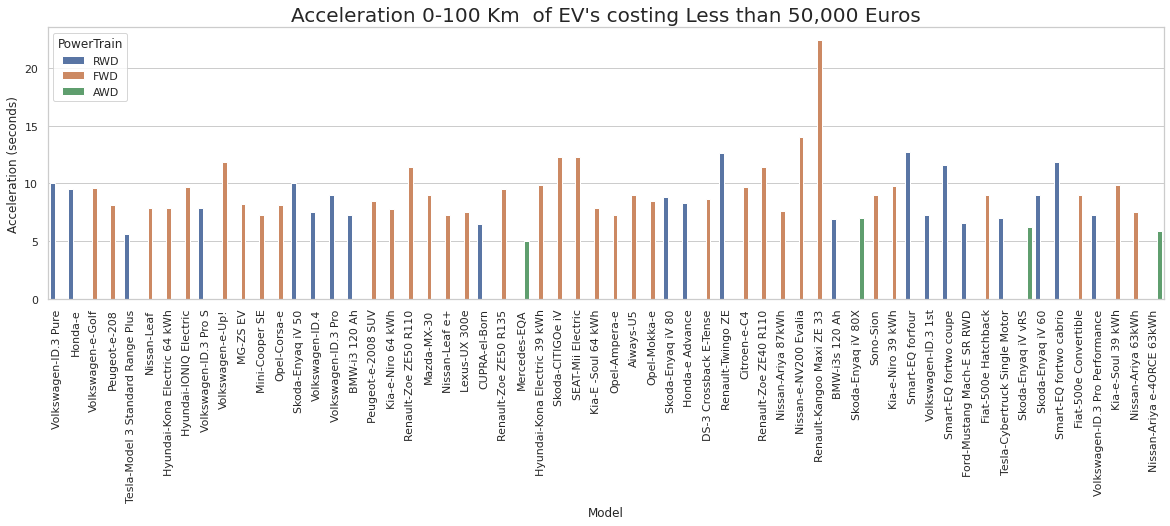

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


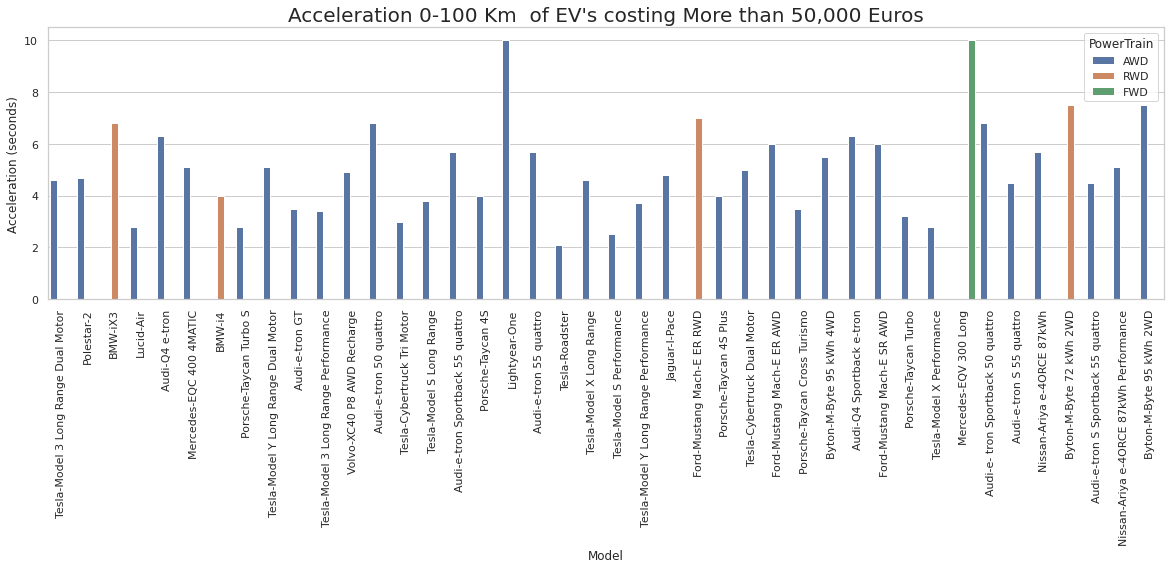

In [ ]:
acc(df_1, t1)
acc(df_2, t2)

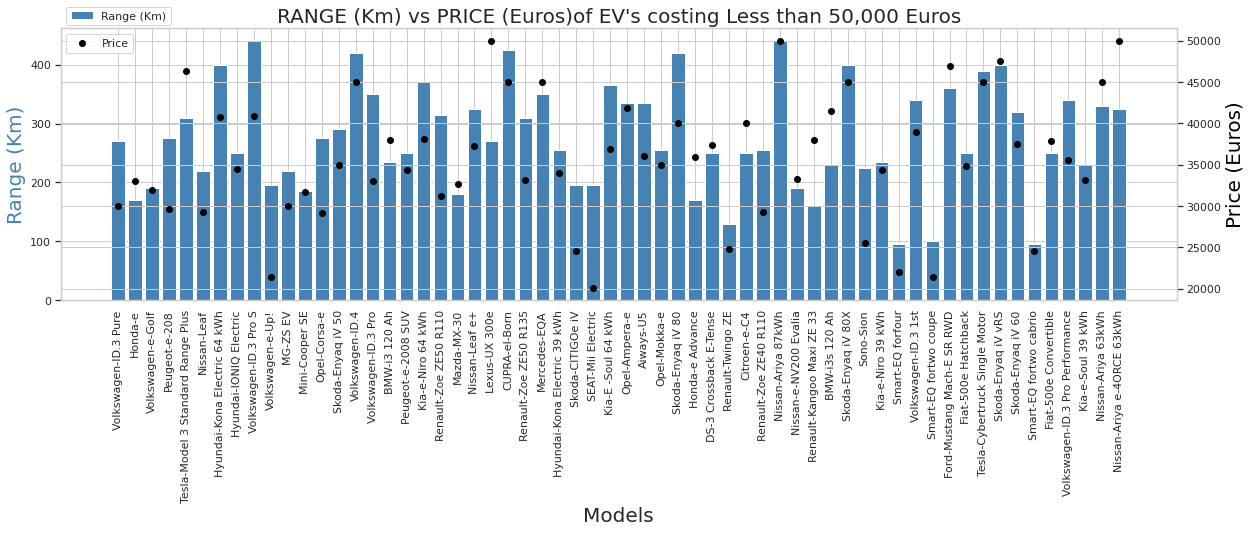

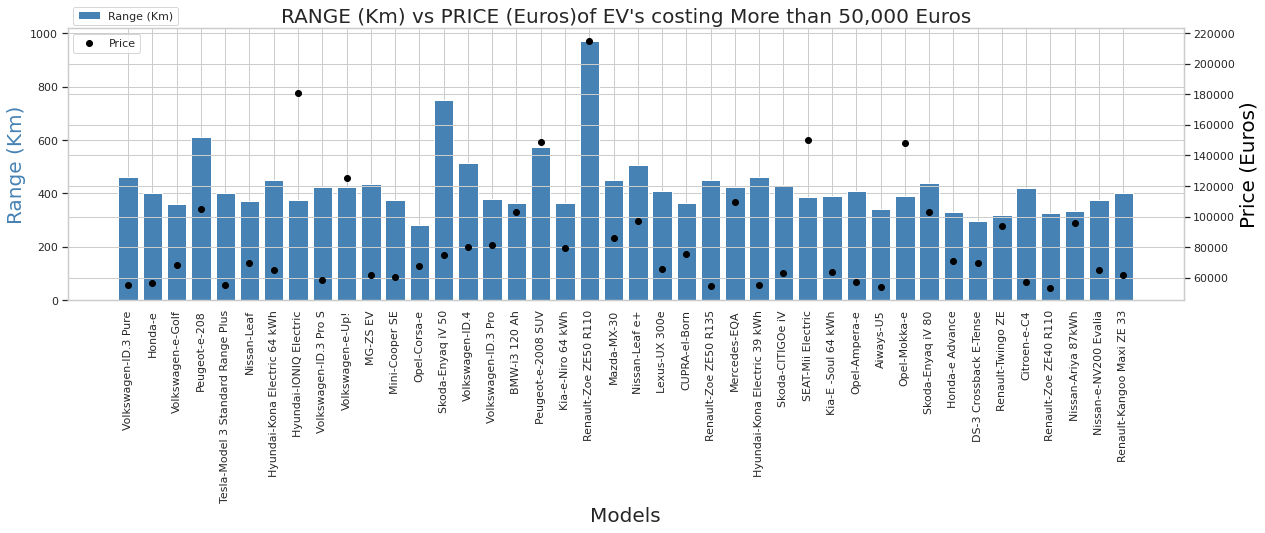

In [ ]:
range_price(df_1, t1)
range_price(df_2, t2)

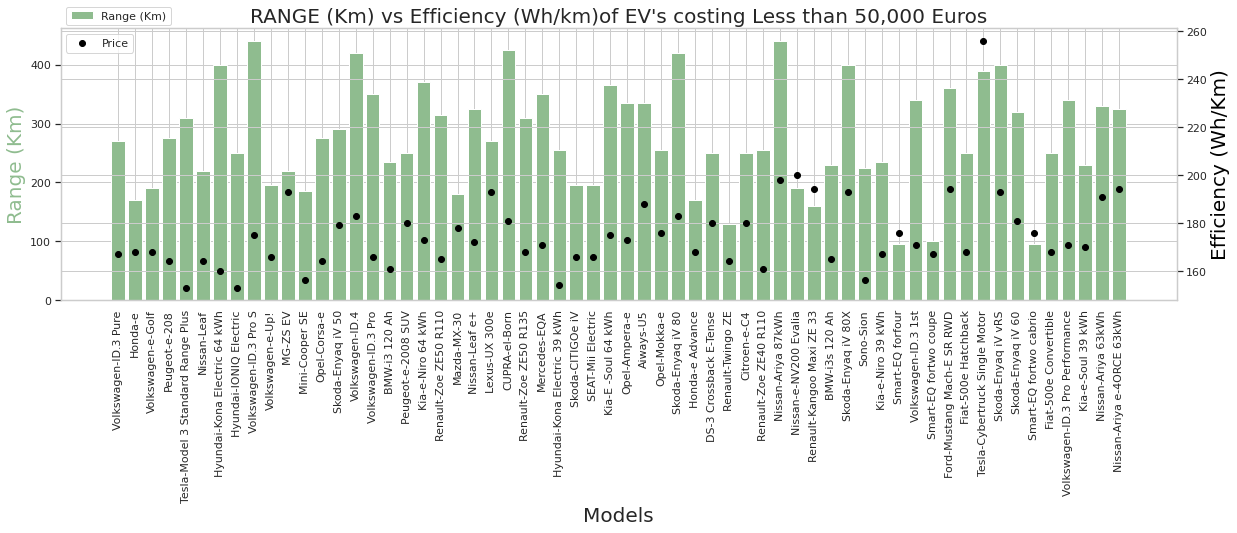

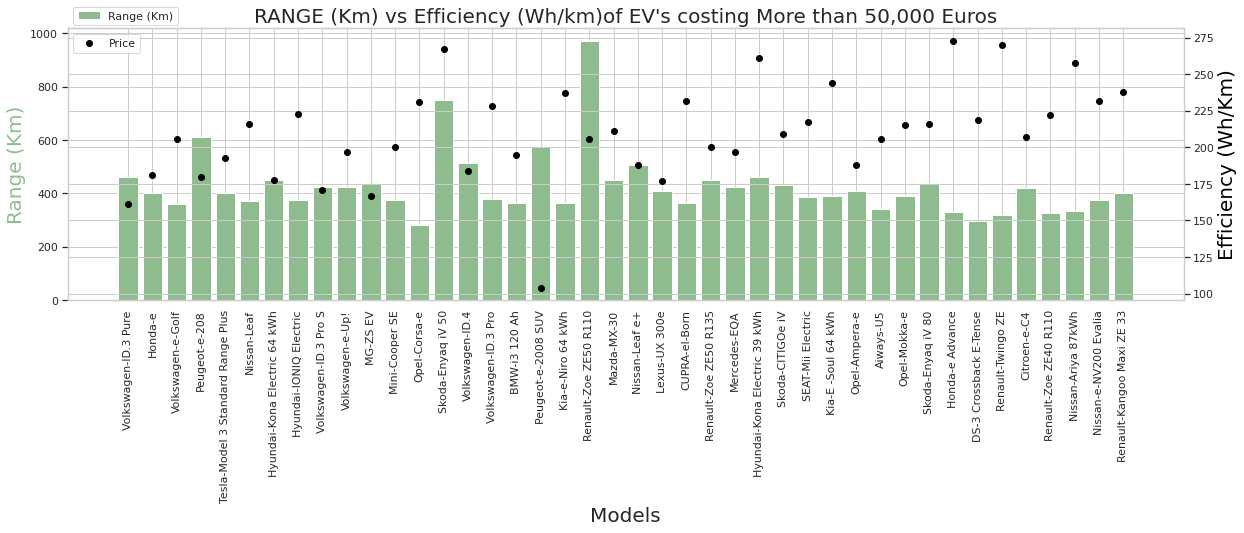

In [ ]:
range_efficiency(df_1, t1)
range_efficiency(df_2, t2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


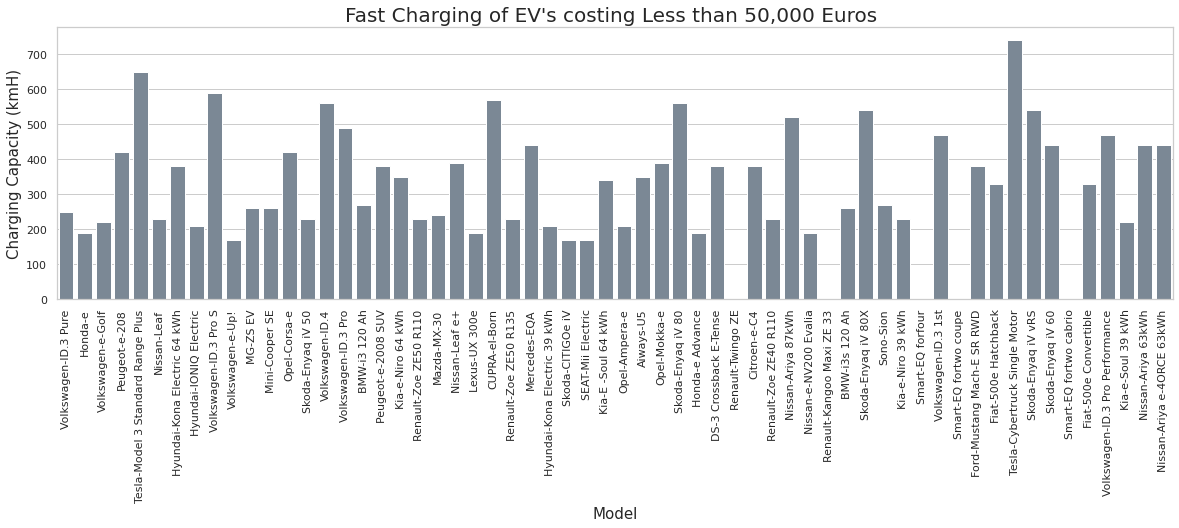

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


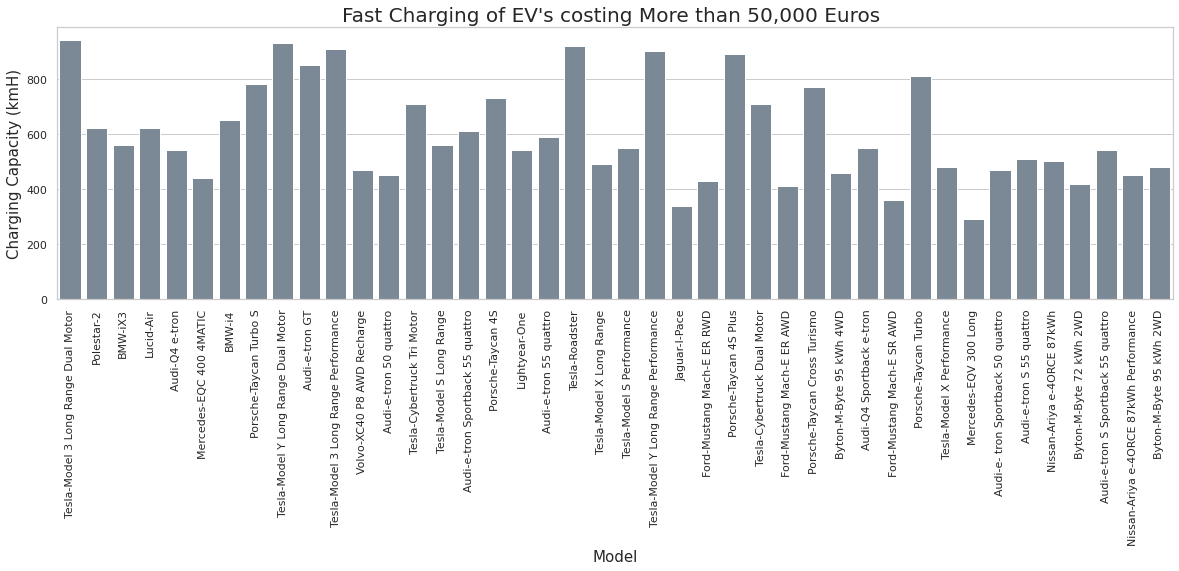

In [ ]:
fastcharge(df_1, t1)
fastcharge(df_2, t2)

In [ ]:
# pie charts

Text(0.5, 1.0, 'Plug Type')

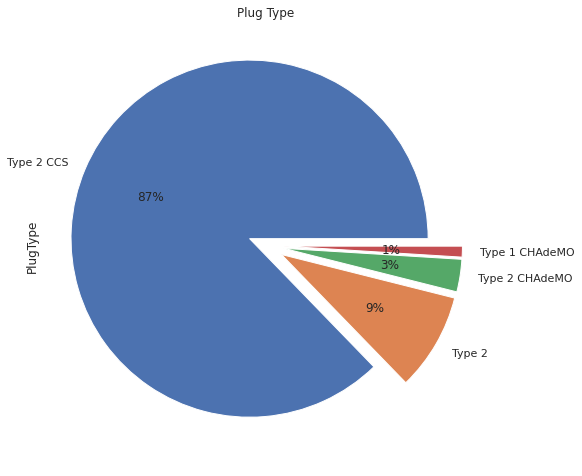

In [ ]:
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

Text(0.5, 1.0, 'Body Style')

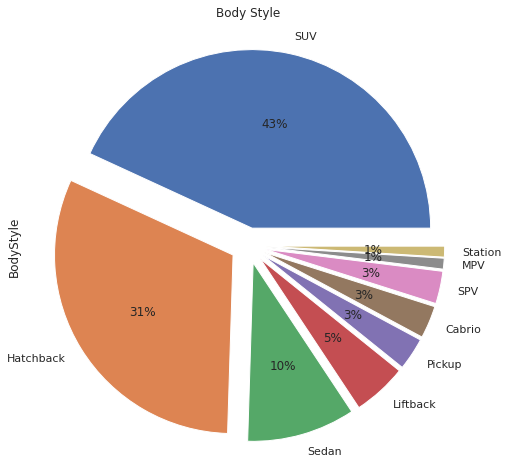

In [ ]:
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

Text(0.5, 1.0, 'Segment')

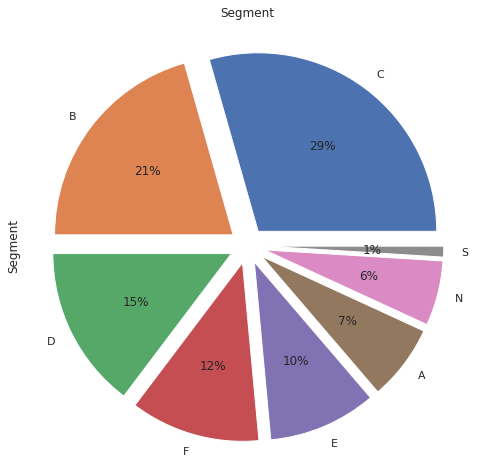

In [ ]:
df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

Text(0.5, 1.0, 'Seats')

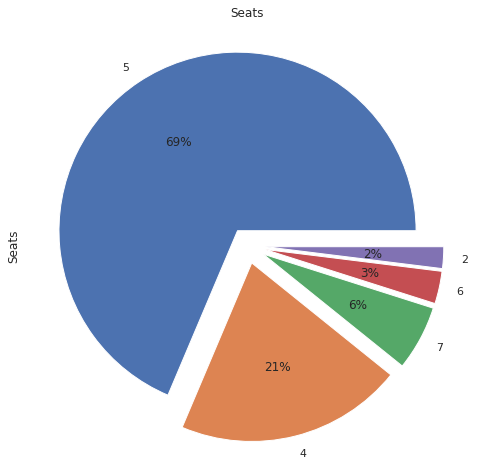

In [ ]:
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

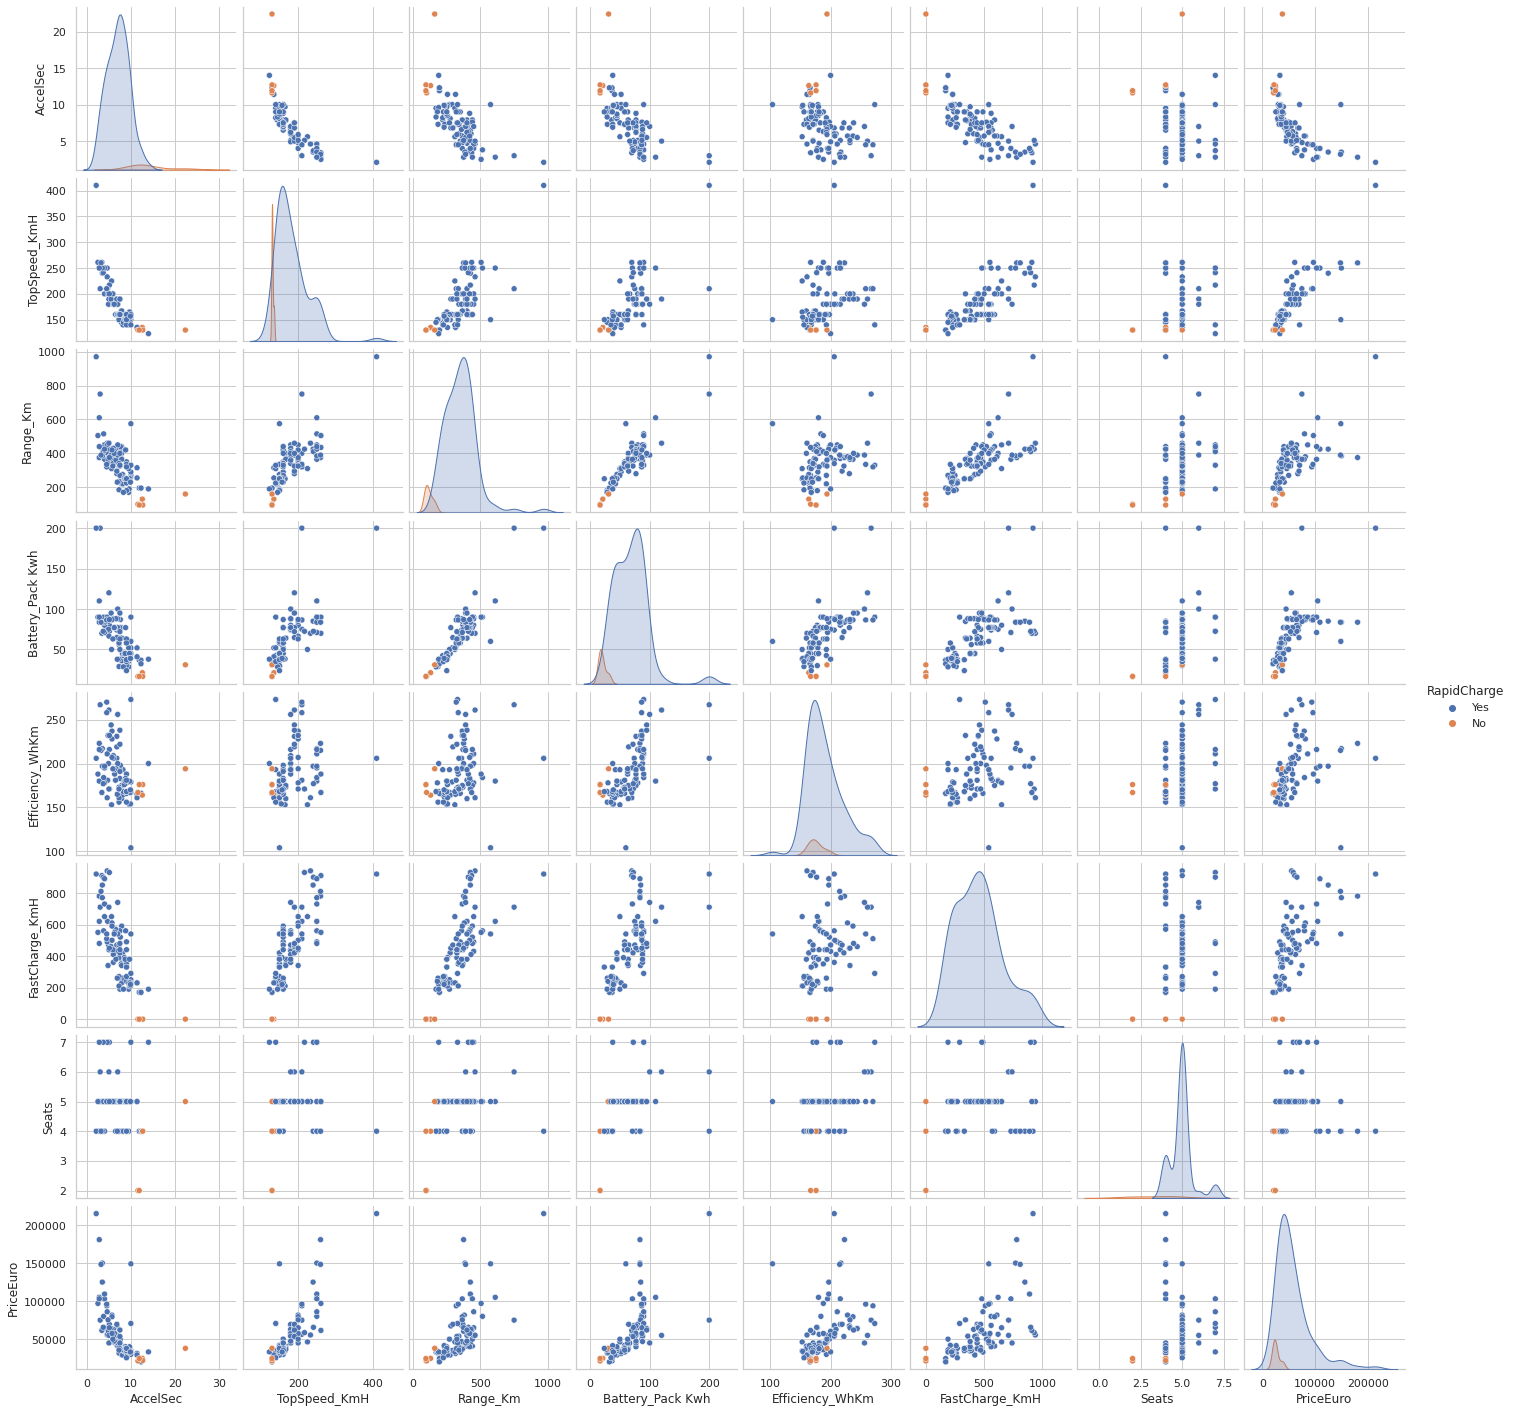

In [ ]:
sns.pairplot(df,hue='RapidCharge')

In [ ]:
# training data set

In [ ]:
from sklearn import preprocessing

In [ ]:
columns = ['Model','Brand','RapidCharge','PowerTrain','PlugType','BodyStyle','Segment']

In [ ]:
df1 = df.copy()

In [ ]:
label_encoder = preprocessing.LabelEncoder()

df1['Model'] = label_encoder.fit_transform(df['Model'])
df1['Brand'] = label_encoder.fit_transform(df['Brand'])
df1['PowerTrain'] = label_encoder.fit_transform(df['PowerTrain'])
df1['PlugType'] = label_encoder.fit_transform(df['PlugType'])
df1['RapidCharge'] = label_encoder.fit_transform(df['RapidCharge'])
df1['BodyStyle'] = label_encoder.fit_transform(df['BodyStyle'])
df1['Segment'] = label_encoder.fit_transform(df['Segment'])


In [ ]:
df1

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,FullName
0,30,47,4.6,233,460,70.0,161,940,1,0,2,7,3,5,55480,Tesla-Model 3 Long Range Dual Motor
1,31,34,10.0,160,270,45.0,167,250,1,2,2,1,2,5,30000,Volkswagen-ID.3 Pure
2,23,0,4.7,210,400,75.0,181,620,1,0,2,2,3,5,56440,Polestar-2
3,2,101,6.8,180,360,74.0,206,560,1,2,2,6,3,5,68040,BMW-iX3
4,9,79,9.5,145,170,28.5,168,190,1,2,2,1,1,4,32997,Honda-e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,20,6,7.5,160,330,63.0,191,440,1,1,2,1,2,5,45000,Nissan-Ariya 63kWh
98,1,95,4.5,210,335,86.5,258,540,1,0,2,6,4,5,96050,Audi-e-tron S Sportback 55 quattro
99,20,8,5.9,200,325,63.0,194,440,1,0,2,1,2,5,50000,Nissan-Ariya e-4ORCE 63kWh
100,20,10,5.1,200,375,87.0,232,450,1,0,2,1,2,5,65000,Nissan-Ariya e-4ORCE 87kWh Performance


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
x = df1.drop(columns=['PriceEuro','FullName'])
y = df1['PriceEuro']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=2)

In [ ]:
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

[15:13:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([145572.92 ,  72256.945,  22561.777,  69408.48 , 135872.08 ,
       143560.75 ,  58917.246,  51082.387,  39590.   ,  64306.492,
        29497.605,  38962.418,  61751.05 ,  34634.773,  55740.65 ,
        56217.836,  53012.34 ,  34869.914,  63708.453,  32889.094,
        40995.836], dtype=float32)

In [ ]:
# finding the difference in predictions and actual values

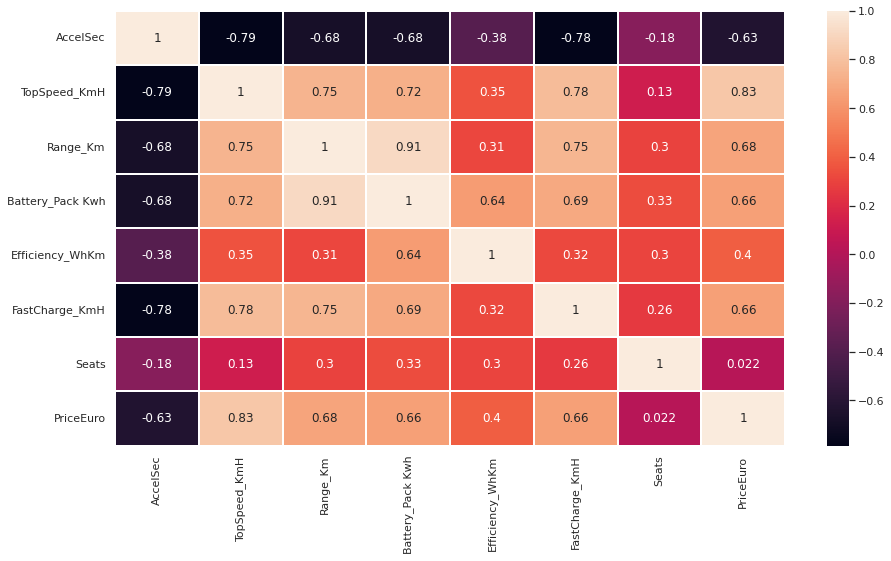

In [ ]:
ax = plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

In [ ]:
from sklearn.metrics import r2_score
r2=(r2_score(y_test,y_pred))
print(r2*100)

91.04931620874407


In [ ]:
# from sklearn.metrics import accuracy_score
# score=accuracy_score(y1_test,pred1)
# score*100